In [18]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#download data from stat canada whith monthly volume of produced products including hard ice cream 
import requests
import zipfile
import io

# Direct CSV ZIP download URL for table 32-10-0112-01 (Ice cream production)
url = "https://www150.statcan.gc.ca/n1/tbl/csv/32100112-eng.zip"

# Download the ZIP file
response = requests.get(url)
zip_bytes = io.BytesIO(response.content)

# Extract ZIP contents
with zipfile.ZipFile(zip_bytes, 'r') as zip_ref:
    zip_ref.extractall("icecream_data")

# Load the data CSV
df = pd.read_csv("icecream_data/32100112.csv")
print(df.head())

  REF_DATE     GEO           DGUID       Commodity         UOM  UOM_ID  \
0  1946-01  Canada  2016A000011124  Cheddar cheese      Tonnes     288   
1  1946-01  Canada  2016A000011124   Ice cream mix  Kilolitres     195   
2  1946-02  Canada  2016A000011124  Cheddar cheese      Tonnes     288   
3  1946-02  Canada  2016A000011124   Ice cream mix  Kilolitres     195   
4  1946-03  Canada  2016A000011124  Cheddar cheese      Tonnes     288   

  SCALAR_FACTOR  SCALAR_ID   VECTOR  COORDINATE   VALUE STATUS  SYMBOL  \
0        units           0  v382649         1.1   770.0    NaN     NaN   
1        units           0  v382661         1.6  1818.0    NaN     NaN   
2        units           0  v382649         1.1   625.0    NaN     NaN   
3        units           0  v382661         1.6  1497.0    NaN     NaN   
4        units           0  v382649         1.1  1274.0    NaN     NaN   

  TERMINATED  DECIMALS  
0        NaN         0  
1        NaN         0  
2        NaN         0  
3        N

In [20]:
# we will study ontario and hard ice cream
#thow there are other options for ice cream are available as well
df[(df['GEO']=='Ontario')& (df['Commodity']=='Hard ice cream')]

REF_DATE      GEO        DGUID       Commodity         UOM  UOM_ID  \
773    1977-01  Ontario  2016A000235  Hard ice cream  Kilolitres     195   
826    1977-02  Ontario  2016A000235  Hard ice cream  Kilolitres     195   
879    1977-03  Ontario  2016A000235  Hard ice cream  Kilolitres     195   
932    1977-04  Ontario  2016A000235  Hard ice cream  Kilolitres     195   
985    1977-05  Ontario  2016A000235  Hard ice cream  Kilolitres     195   
...        ...      ...          ...             ...         ...     ...   
43531  2024-08  Ontario  2016A000235  Hard ice cream  Kilolitres     195   
43617  2024-09  Ontario  2016A000235  Hard ice cream  Kilolitres     195   
43703  2024-10  Ontario  2016A000235  Hard ice cream  Kilolitres     195   
43789  2024-11  Ontario  2016A000235  Hard ice cream  Kilolitres     195   
43875  2024-12  Ontario  2016A000235  Hard ice cream  Kilolitres     195   

      SCALAR_FACTOR  SCALAR_ID   VECTOR  COORDINATE    VALUE STATUS  SYMBOL  \
773          units           0  v382712         7.4   5783.0    NaN     NaN   
826          units           0  v382712         7.4   6137.0    NaN     NaN   
879          units           0  v382712         7.4   6810.0    NaN     NaN   
932          units           0  v382712         7.4   8710.0    NaN     NaN   
985          units           0  v382712         7.4  10524.0    NaN     NaN   
...             ...        ...      ...         ...      ...    ...     ...   
43531         units          0  v382712         7.4  11742.0    NaN     NaN   
43617         units          0  v382712         7.4   8323.0    NaN     NaN   
43703         units          0  v382712         7.4   9817.0    NaN     NaN   
43789         units          0  v382712         7.4  10452.0    NaN     NaN   
43875         units          0  v382712         7.4   4532.0    NaN     NaN   

      TERMINATED  DECIMALS  
773          NaN         0  
826          NaN         0  
879          NaN         0  
932          NaN         0  
985          NaN         0  
...          ...       ...  
43531        NaN         0  
43617        NaN         0  
43703        NaN         0  
43789        NaN         0  
43875        NaN         0  

[576 rows x 15 columns]

In [21]:
#df_ont=df[(df['GEO']=='Ontario')& (df['Commodity']=='Hard ice cream')].copy()
df_ont=df[(df['GEO']=='Ontario')& (df['Commodity']=='Hard ice cream')][['REF_DATE','VALUE']].copy()

In [22]:
#volume of produced ise cream in each year and month
df_ont['Year']=(pd.to_datetime(df_ont['REF_DATE'])).dt.year
df_ont['Month']=(pd.to_datetime(df_ont['REF_DATE'])).dt.month
df_ont_s=df_ont[['Year','Month','VALUE']].copy()
df_ont_s=df_ont_s.set_index(['Year', 'Month']).unstack()
df_ont_s

VALUE                                                                 \
Month       1        2        3        4        5        6        7        8    
Year                                                                            
1977    5783.0   6137.0   6810.0   8710.0  10524.0  12020.0  10456.0   8324.0   
1978    5358.0   6220.0   8714.0   7138.0   9184.0  12987.0   9702.0  10458.0   
1979    6108.0   5785.0   8889.0   9138.0  11434.0  12201.0  11404.0  10796.0   
1980    6694.0   6629.0   8727.0   8554.0  10926.0  13082.0  13190.0  12069.0   
1981    7410.0   7690.0   9816.0  10112.0  10670.0  13952.0  14058.0  11351.0   
1982    6500.0   6021.0  10123.0   9991.0  11776.0  13294.0  14280.0  11607.0   
1983    7302.0   6756.0   8666.0   8824.0  12354.0  14922.0  14596.0  13004.0   
1984    6632.0   6378.0   8493.0  10521.0  11103.0  13709.0  12712.0  12748.0   
1985    6834.0   7821.0  12141.0  10823.0  13590.0  12189.0  14124.0  12692.0   
1986    6958.0   7406.0   9570.0  12433.0  13285.0  14487.0  15154.0  11921.0   
1987    7406.0   9060.0  11575.0   9829.0  10157.0  12703.0  15024.0  11911.0   
1988    6240.0   8911.0  10440.0  10151.0  12899.0  15515.0  13898.0  14003.0   
1989    7348.0   8095.0   9843.0  11229.0  13476.0  12952.0  12560.0  12349.0   
1990    6186.0   8241.0  11845.0  11599.0  14457.0  15359.0  15146.0  13709.0   
1991    5169.0   7163.0  11121.0  11765.0  13430.0  16161.0  13630.0  13316.0   
1992    6789.0   8661.0  11845.0  11316.0  10037.0  14228.0  11780.0  10566.0   
1993    4309.0   9843.0  12189.0  11672.0  13425.0  17541.0  15172.0  14197.0   
1994    4391.0   9110.0  15347.0  14145.0  18052.0  20013.0  13513.0  14534.0   
1995    5469.0  11462.0  12222.0  12640.0  13340.0  15980.0  14783.0  13386.0   
1996    7213.0  10655.0  13666.0  14586.0  14024.0  15586.0  18161.0  15820.0   
1997    7326.0  10161.0  11960.0  12494.0  13275.0  16965.0  18153.0  15913.0   
1998    6945.0   9551.0  14912.0  15266.0  16488.0  19622.0  17517.0  13965.0   
1999   10095.0  11311.0  16604.0  15793.0  17600.0  19127.0  16049.0  17227.0   
2000   11571.0   9651.0  14178.0  14492.0  21799.0  17735.0  15745.0  17510.0   
2001    8306.0  10823.0  15064.0  14814.0  17511.0  17986.0  17604.0  18961.0   
2002    9269.0  14809.0  22793.0  20627.0  22744.0  22670.0  22139.0  20549.0   
2003    8452.0  14239.0  17982.0  19810.0  20706.0  23901.0  20993.0  17200.0   
2004   10189.0  14116.0  13199.0  19100.0  18311.0  24169.0  20217.0  17613.0   
2005   12853.0  17364.0  19770.0  20717.0  20294.0  22315.0  23671.0  22323.0   
2006    9893.0  16583.0  21299.0  18725.0  21897.0  20424.0  23918.0  19512.0   
2007   10194.0  12065.0  17511.0  18563.0  21578.0  18880.0  20575.0  19983.0   
2008    7806.0  13352.0  15810.0  16745.0  15159.0  17026.0  18563.0  15055.0   
2009    8737.0  10164.0  13984.0  12234.0  10659.0  12446.0  13651.0  14145.0   
2010    7466.0   7823.0   9011.0   7722.0   8939.0  11922.0  10609.0  15160.0   
2011    6172.0   9396.0   8232.0   8159.0  14418.0  12420.0  11592.0  13066.0   
2012    6200.0   8280.0   9557.0   8064.0   9692.0  11935.0  12274.0   9910.0   
2013    6092.0   6370.0   7639.0   9616.0  11030.0  10407.0  12270.0   9912.0   
2014    6710.0   8451.0  12387.0  12321.0  14029.0  14568.0  15074.0  11810.0   
2015    5361.0   7486.0  10918.0  12319.0  11178.0  13542.0  10528.0   8589.0   
2016    5164.0   8010.0   8363.0  10637.0  11051.0  12872.0  10882.0   9985.0   
2017    5471.0   6144.0   9908.0   9373.0  11457.0  12982.0  12479.0   9772.0   
2018    6205.0   6120.0   8184.0   7945.0  10299.0  12334.0  12386.0  12056.0   
2019    6284.0   6616.0   8144.0   9074.0  11334.0   9759.0  12631.0  10272.0   
2020    5706.0   6880.0   5517.0   5248.0   7475.0   9974.0  10758.0   8776.0   
2021    5692.0   6618.0  10065.0   8273.0  10003.0  10265.0  10119.0   9697.0   
2022    7061.0   6413.0   9351.0  10648.0   8324.0  10426.0   9383.0   9698.0   
2023    7523.0   8166.0  10371.0   8640.

In [23]:
df_ont_s.columns = df_ont_s.columns.droplevel(0)
df_ont_s

Month       1        2        3        4        5        6        7        8   \
Year                                                                            
1977    5783.0   6137.0   6810.0   8710.0  10524.0  12020.0  10456.0   8324.0   
1978    5358.0   6220.0   8714.0   7138.0   9184.0  12987.0   9702.0  10458.0   
1979    6108.0   5785.0   8889.0   9138.0  11434.0  12201.0  11404.0  10796.0   
1980    6694.0   6629.0   8727.0   8554.0  10926.0  13082.0  13190.0  12069.0   
1981    7410.0   7690.0   9816.0  10112.0  10670.0  13952.0  14058.0  11351.0   
1982    6500.0   6021.0  10123.0   9991.0  11776.0  13294.0  14280.0  11607.0   
1983    7302.0   6756.0   8666.0   8824.0  12354.0  14922.0  14596.0  13004.0   
1984    6632.0   6378.0   8493.0  10521.0  11103.0  13709.0  12712.0  12748.0   
1985    6834.0   7821.0  12141.0  10823.0  13590.0  12189.0  14124.0  12692.0   
1986    6958.0   7406.0   9570.0  12433.0  13285.0  14487.0  15154.0  11921.0   
1987    7406.0   9060.0  11575.0   9829.0  10157.0  12703.0  15024.0  11911.0   
1988    6240.0   8911.0  10440.0  10151.0  12899.0  15515.0  13898.0  14003.0   
1989    7348.0   8095.0   9843.0  11229.0  13476.0  12952.0  12560.0  12349.0   
1990    6186.0   8241.0  11845.0  11599.0  14457.0  15359.0  15146.0  13709.0   
1991    5169.0   7163.0  11121.0  11765.0  13430.0  16161.0  13630.0  13316.0   
1992    6789.0   8661.0  11845.0  11316.0  10037.0  14228.0  11780.0  10566.0   
1993    4309.0   9843.0  12189.0  11672.0  13425.0  17541.0  15172.0  14197.0   
1994    4391.0   9110.0  15347.0  14145.0  18052.0  20013.0  13513.0  14534.0   
1995    5469.0  11462.0  12222.0  12640.0  13340.0  15980.0  14783.0  13386.0   
1996    7213.0  10655.0  13666.0  14586.0  14024.0  15586.0  18161.0  15820.0   
1997    7326.0  10161.0  11960.0  12494.0  13275.0  16965.0  18153.0  15913.0   
1998    6945.0   9551.0  14912.0  15266.0  16488.0  19622.0  17517.0  13965.0   
1999   10095.0  11311.0  16604.0  15793.0  17600.0  19127.0  16049.0  17227.0   
2000   11571.0   9651.0  14178.0  14492.0  21799.0  17735.0  15745.0  17510.0   
2001    8306.0  10823.0  15064.0  14814.0  17511.0  17986.0  17604.0  18961.0   
2002    9269.0  14809.0  22793.0  20627.0  22744.0  22670.0  22139.0  20549.0   
2003    8452.0  14239.0  17982.0  19810.0  20706.0  23901.0  20993.0  17200.0   
2004   10189.0  14116.0  13199.0  19100.0  18311.0  24169.0  20217.0  17613.0   
2005   12853.0  17364.0  19770.0  20717.0  20294.0  22315.0  23671.0  22323.0   
2006    9893.0  16583.0  21299.0  18725.0  21897.0  20424.0  23918.0  19512.0   
2007   10194.0  12065.0  17511.0  18563.0  21578.0  18880.0  20575.0  19983.0   
2008    7806.0  13352.0  15810.0  16745.0  15159.0  17026.0  18563.0  15055.0   
2009    8737.0  10164.0  13984.0  12234.0  10659.0  12446.0  13651.0  14145.0   
2010    7466.0   7823.0   9011.0   7722.0   8939.0  11922.0  10609.0  15160.0   
2011    6172.0   9396.0   8232.0   8159.0  14418.0  12420.0  11592.0  13066.0   
2012    6200.0   8280.0   9557.0   8064.0   9692.0  11935.0  12274.0   9910.0   
2013    6092.0   6370.0   7639.0   9616.0  11030.0  10407.0  12270.0   9912.0   
2014    6710.0   8451.0  12387.0  12321.0  14029.0  14568.0  15074.0  11810.0   
2015    5361.0   7486.0  10918.0  12319.0  11178.0  13542.0  10528.0   8589.0   
2016    5164.0   8010.0   8363.0  10637.0  11051.0  12872.0  10882.0   9985.0   
2017    5471.0   6144.0   9908.0   9373.0  11457.0  12982.0  12479.0   9772.0   
2018    6205.0   6120.0   8184.0   7945.0  10299.0  12334.0  12386.0  12056.0   
2019    6284.0   6616.0   8144.0   9074.0  11334.0   9759.0  12631.0  10272.0   
2020    5706.0   6880.0   5517.0   5248.0   7475.0   9974.0  10758.0   8776.0   
2021    5692.0   6618.0  10065.0   8273.0  10003.0  10265.0  10119.0   9697.0   
2022    7061.0   6413.0   9351.0  10648.0   8324.0  10426.0   9383.0   9698.0   
2023    7523.0   8166.0  10371.0   8640.0  11230.0  11390.0  11105.0  11470.0   
2024    7648.0   7659.0  10142.

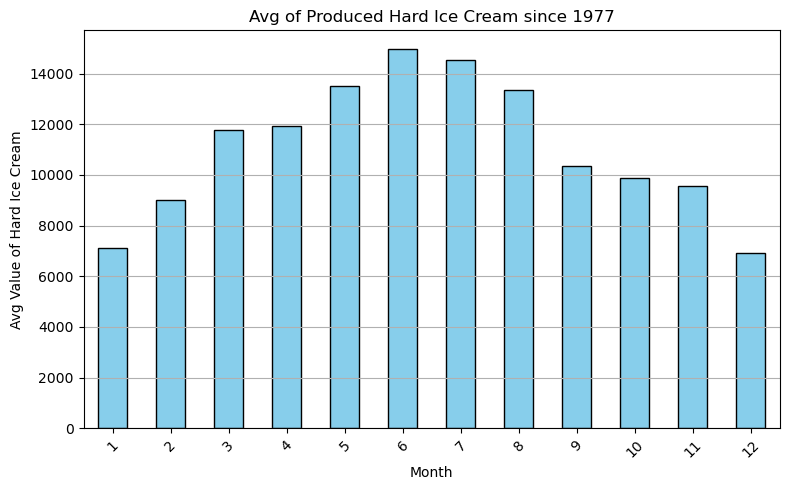

In [24]:
# mean value of produced ice cream per month (based on data from 1977 to 2024)
totals = df_ont_s.mean()

# Plot totals
totals.plot(kind='bar', figsize=(8, 5), color='skyblue', edgecolor='black')
plt.title("Avg of Produced Hard Ice Cream since 1977")
plt.ylabel("Avg Value of Hard Ice Cream")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [25]:
#here we upload weather report - see ottawa_weather_data notebook for details.
# to be updated to ontario weather
df_agg_month=pd.read_csv('weather_data\weather_agg_month.csv',sep=',')

In [26]:
df_agg_month

Year  Month  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)  \
0     1889     11           14.4          -11.7        1.186667   
1     1889     12            5.6          -23.3       -5.629032   
2     1890      1            8.9          -28.9       -9.877419   
3     1890      2            7.2          -24.4       -8.803571   
4     1890      3            6.1          -23.3       -4.854839   
...    ...    ...            ...            ...             ...   
1620  2025      1            2.5          -21.0       -8.141935   
1621  2025      2            6.0          -23.0       -9.160000   
1622  2025      3           17.0          -23.5       -0.119355   
1623  2025      4           25.0           -9.0        6.113333   
1624  2025      5           28.0            0.0       14.694737   

      Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  
0            1.650000         0.676667           2.326667  
1            1.600000         0.606452           2.206452  
2            1.432258         1.758065           3.190323  
3            1.725000         1.782143           3.507143  
4            0.609677         0.687097           1.293548  
...               ...              ...                ...  
1620         0.167742         0.935484           0.845161  
1621         0.040000         3.080000           2.304000  
1622         0.864516         1.032258           1.774194  
1623         2.433333         0.433333           2.766667  
1624         1.494737         0.000000           1.494737  

[1625 rows x 8 columns]

In [27]:
df_ott_w=df_agg_month[['Year','Month','Max Temp (°C)']].copy()
df_ott_w=df_ott_w.set_index(['Year', 'Month']).unstack()
df_ott_w

Max Temp (°C)                                                        \
Month            1     2     3     4     5     6     7     8     9     10   
Year                                                                        
1889            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1890            8.9   7.2   6.1  20.0  25.0  32.8  32.8  33.9  29.4  26.1   
1891            2.2   6.7  11.1  27.2  29.4  33.9  30.6  32.2  31.7  29.4   
1892            2.8   6.7   5.6  18.9  29.4  32.2  36.1  31.1  28.3  21.1   
1893            4.4   3.9   7.2  18.3  31.1  33.3  31.1  35.0  24.4  22.8   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2021            1.5   5.0  20.0  25.0  32.0  33.5  30.5  33.5  27.0  25.0   
2022            3.0   6.5  15.0  20.0  31.0  32.0  33.0  33.0  29.5  24.5   
2023            5.0  10.0   9.5  30.0  32.0  34.5  33.0  29.0  34.0  31.0   
2024            5.5  16.0  17.0  23.0  31.0  31.0  32.0  32.5  31.0  25.0   
2025            2.5   6.0  17.0  25.0  28.0   NaN   NaN   NaN   NaN   NaN   

                   
Month    11    12  
Year               
1889   14.4   5.6  
1890   13.9   3.3  
1891   16.7   9.4  
1892   14.4   2.8  
1893   12.2   2.8  
...     ...   ...  
2021   15.5  16.0  
2022   24.0  10.0  
2023   15.0   9.0  
2024   20.5   7.5  
2025    NaN   NaN  

[137 rows x 12 columns]

In [28]:
df_ott_s=df_ott_w.loc[df_ott_w.index > 1976]

In [29]:
df_ott_s.corr()

Max Temp (°C)                                          \
Month                          1         2         3         4         5    
              Month                                                         
Max Temp (°C) 1          1.000000  0.233696 -0.032841 -0.283589  0.027664   
              2          0.233696  1.000000  0.018905  0.142989 -0.030740   
              3         -0.032841  0.018905  1.000000  0.110468  0.312683   
              4         -0.283589  0.142989  0.110468  1.000000  0.104997   
              5          0.027664 -0.030740  0.312683  0.104997  1.000000   
              6          0.239465  0.355727  0.008942 -0.015904  0.173167   
              7          0.069678  0.038789  0.041325 -0.126528  0.289402   
              8         -0.132304 -0.094573  0.190497  0.061401  0.181054   
              9          0.017172  0.133022 -0.194935  0.258688  0.085473   
              10         0.334075  0.247503 -0.324451  0.041998  0.021697   
              11        -0.142665  0.116502  0.055059  0.204654  0.199511   
              12        -0.193261 -0.011725  0.040621  0.142198  0.224039   

                                                                       \
Month                      6         7         8         9         10   
              Month                                                     
Max Temp (°C) 1      0.239465  0.069678 -0.132304  0.017172  0.334075   
              2      0.355727  0.038789 -0.094573  0.133022  0.247503   
              3      0.008942  0.041325  0.190497 -0.194935 -0.324451   
              4     -0.015904 -0.126528  0.061401  0.258688  0.041998   
              5      0.173167  0.289402  0.181054  0.085473  0.021697   
              6      1.000000  0.197636  0.269231  0.088439  0.403954   
              7      0.197636  1.000000  0.264316  0.156201  0.200247   
              8      0.269231  0.264316  1.000000  0.199354 -0.009452   
              9      0.088439  0.156201  0.199354  1.000000  0.368763   
              10     0.403954  0.200247 -0.009452  0.368763  1.000000   
              11     0.050263  0.246018  0.193431  0.101320  0.042127   
              12     0.013131  0.112063  0.190448  0.246455 -0.130152   

                                         
Month                      11        12  
              Month                      
Max Temp (°C) 1     -0.142665 -0.193261  
              2      0.116502 -0.011725  
              3      0.055059  0.040621  
              4      0.204654  0.142198  
              5      0.199511  0.224039  
              6      0.050263  0.013131  
              7      0.246018  0.112063  
              8      0.193431  0.190448  
              9      0.101320  0.246455  
              10     0.042127 -0.130152  
              11     1.000000  0.397462  
              12     0.397462  1.000000

In [30]:
# Piarson correlation between monthly production and monthly weather

corr_matrix = pd.DataFrame({
    col2: df_ott_s.corrwith(df_ont_s[col2]) for col2 in df_ont_s.columns
})
corr_matrix

1         2         3         4         5   \
              Month                                                     
Max Temp (°C) 1      0.216155  0.262369  0.153247  0.178962  0.249198   
              2      0.121374 -0.029004 -0.073290 -0.085654  0.059036   
              3      0.199329  0.160560  0.124614  0.120639  0.134056   
              4      0.219667  0.235251  0.302695  0.222301  0.195226   
              5     -0.122721 -0.157334 -0.187947 -0.247302 -0.223121   
              6      0.012459  0.180004  0.077120  0.017608  0.046717   
              7     -0.253319 -0.149441 -0.275452 -0.319181 -0.231088   
              8      0.174430  0.270610  0.292753  0.160220  0.139400   
              9      0.246397  0.138889  0.234059  0.189943  0.253843   
              10     0.031324  0.097459  0.023875  0.064944  0.164072   
              11    -0.039909  0.011515  0.007727 -0.000222 -0.140379   
              12    -0.179700 -0.142748 -0.028560 -0.106696 -0.135077   

                           6         7         8         9         10  \
              Month                                                     
Max Temp (°C) 1      0.185258  0.289321  0.325549  0.163602  0.254394   
              2     -0.048442 -0.008550  0.083962 -0.018742  0.015224   
              3      0.105441  0.164498  0.085221  0.136639  0.118681   
              4      0.159257  0.207807  0.207234  0.287947  0.235071   
              5     -0.226601 -0.350200 -0.215326 -0.172915 -0.089862   
              6      0.086894  0.043947  0.133912  0.093852  0.056098   
              7     -0.237100 -0.218243 -0.176877 -0.208026 -0.124235   
              8      0.118814  0.216705  0.311089  0.237702  0.278191   
              9      0.146855  0.101096  0.220084  0.125700  0.278988   
              10     0.094794  0.052782  0.131147  0.064575  0.117221   
              11    -0.121716 -0.118801 -0.149198 -0.105944 -0.091638   
              12    -0.147870 -0.191677 -0.176398 -0.237527 -0.092499   

                           11        12  
              Month                      
Max Temp (°C) 1      0.311551  0.199784  
              2      0.091095 -0.021583  
              3      0.190949  0.131452  
              4      0.173130  0.067277  
              5      0.102527 -0.176217  
              6      0.083101  0.108563  
              7      0.043729 -0.035271  
              8      0.348362  0.288548  
              9      0.272264  0.166065  
              10     0.177974  0.128898  
              11    -0.062546 -0.122375  
              12    -0.008515 -0.201297

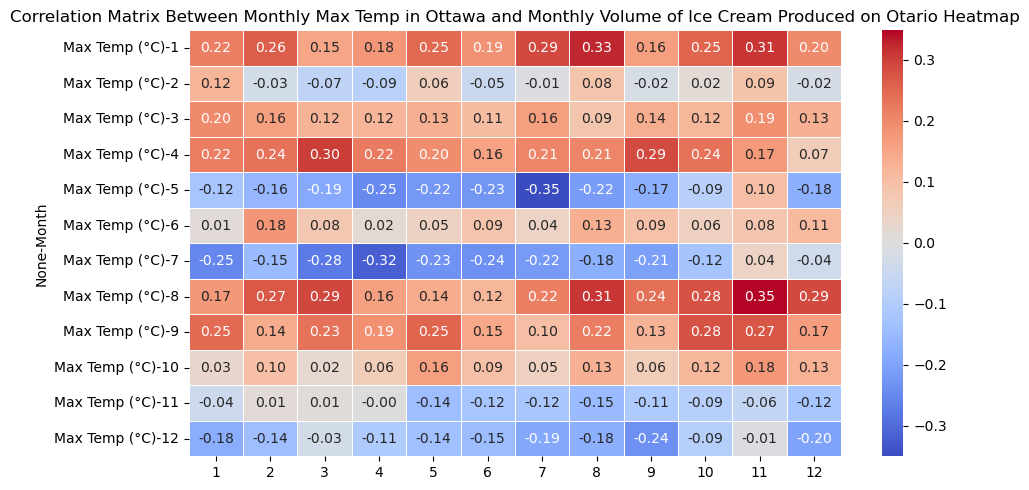

In [31]:
#Heat map
# Piarson correlation between monthly production and monthly weather

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Monthly Max Temp in Ottawa and Monthly Volume of Ice Cream Produced on Otario Heatmap')
plt.tight_layout()
plt.show()

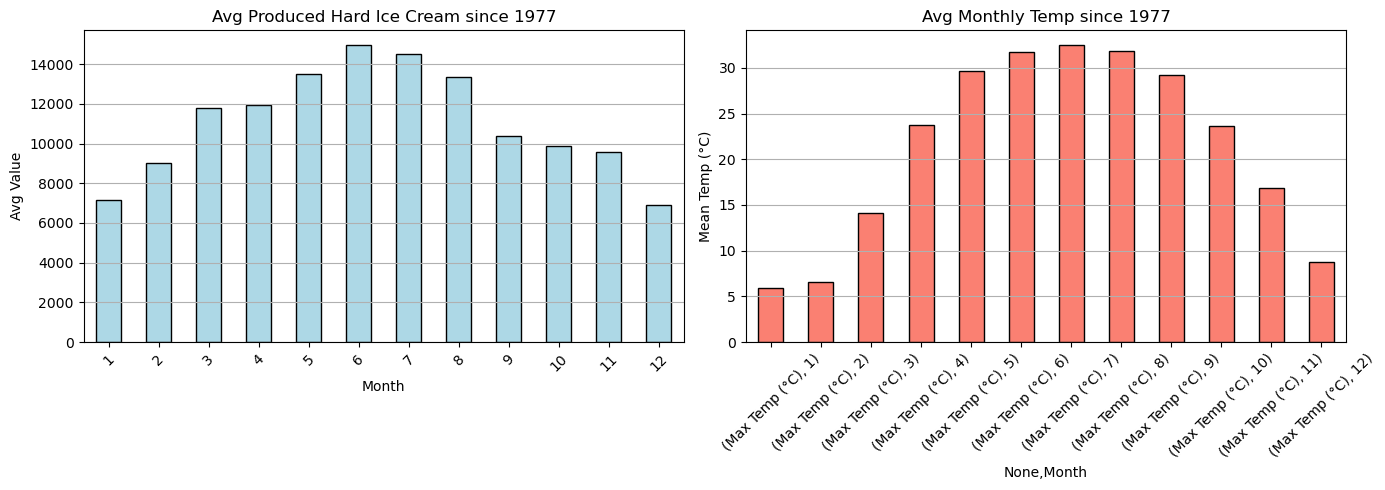

In [32]:
# Mean volume for each month and max temp
# Calculate means
ice_cream_avg = df_ont_s.mean()
temperature_avg = df_ott_s.mean()

# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 5))


# Plot first bar chart (Ice Cream Production)
ice_cream_avg.plot(kind='bar', ax=axs[0], color='lightblue', edgecolor='black')
axs[0].set_title("Avg Produced Hard Ice Cream since 1977")
axs[0].set_ylabel("Avg Value")
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y')

# Plot second bar chart (Monthly Temperature)
temperature_avg.plot(kind='bar', ax=axs[1], color='salmon', edgecolor='black')
axs[1].set_title("Avg Monthly Temp since 1977")
axs[1].set_ylabel("Mean Temp (°C)")
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y')

# Adjust layout and show
plt.tight_layout()
plt.show()
